In [1]:
# Importing liabraries and framework for the machine learning model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the dataset
data = pd.read_csv('D:/dataset/train.csv')
data

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


In [3]:
# dataset sampling, half of the data has been taken
data = data.sample(frac=0.5)

In [5]:
# song data is going to be loaded and joined
songs = pd.read_csv('D:/dataset/songs.csv')
data = pd.merge(data, songs, on='song_id', how='left')
del songs

# members data is going to be loaded and joined
members = pd.read_csv('D:/dataset/members.csv')
data = pd.merge(data, members, on='msno', how='left')
del members

In [6]:
# information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688709 entries, 0 to 3688708
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  city                    int64  
 13  bd                      int64  
 14  gender                  object 
 15  registered_via          int64  
 16  registration_init_time  int64  
 17  expiration_date         int64  
dtypes: float64(2), int64(6), object(10)
memory usage: 534.7+ MB


In [7]:
# description of the dataset
data.describe()

,target,song_length,language,city,bd,registered_via,registration_init_time,expiration_date
count,3.688709e+06,3.688657e+06,3.688636e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06
mean,5.034360e-01,2.451573e+05,1.862261e+01,7.514731e+00,1.752389e+01,6.794501e+00,2.012810e+07,2.017157e+07
std,4.999883e-01,6.836983e+04,2.118250e+01,6.642452e+00,2.119093e+01,2.275515e+00,3.016336e+04,3.873833e+03
min,0.000000e+00,1.950000e+03,-1.000000e+00,1.000000e+00,-4.300000e+01,3.000000e+00,2.004033e+07,1.970010e+07
25%,0.000000e+00,2.147260e+05,3.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,2.011070e+07,2.017091e+07
50%,1.000000e+00,2.418590e+05,3.000000e+00,5.000000e+00,2.100000e+01,7.000000e+00,2.013102e+07,2.017093e+07
75%,1.000000e+00,2.721150e+05,5.200000e+01,1.300000e+01,2.900000e+01,9.000000e+00,2.015102e+07,2.017101e+07
max,1.000000e+00,1.085171e+07,5.900000e+01,2.200000e+01,1.051000e+03,1.300000e+01,2.017013e+07,2.020102e+07


In [8]:
# Checking the null values and the unique value
dtypes = pd.DataFrame(data.dtypes,columns=["Data Type"])

dtypes["Unique Values"]=data.nunique().sort_values(ascending=True)

dtypes["Null Values"]=data.isnull().sum()

dtypes["% null Values"]=data.isnull().sum()/len(data)

dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

,Data Type,Unique Values,Null Values,% null Values
lyricist,object,27388,1591197,0.431370
gender,object,2,1480783,0.401437
composer,object,59419,838174,0.227227
source_screen_name,object,20,207081,0.056139
genre_ids,object,517,59301,0.016076
source_system_tab,object,8,12375,0.003355
source_type,object,12,10677,0.002895
language,float64,10,73,0.000020
song_length,float64,49772,52,0.000014
artist_name,object,32254,52,0.000014


In [9]:
# Unknown string
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(value = "unknown")
# Numeric value with the mean value 
for col in data.select_dtypes(exclude=['object']).columns:
    data[col] = data[col].fillna(value = data[col].mean())

In [10]:
# checking null value in the dataset
data.isna().sum()

msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

# Parsing Dates and Extracting new Date Features

In [11]:
data['registration_init_time'] = pd.to_datetime(data['registration_init_time'], format='%Y%m%d', errors='ignore')
data['registration_init_time_year'] = data['registration_init_time'].dt.year
data['registration_init_time_month'] = data['registration_init_time'].dt.month
data['registration_init_time_day'] = data['registration_init_time'].dt.day


data['expiration_date'] = pd.to_datetime(data['expiration_date'],  format='%Y%m%d', errors='ignore')
data['expiration_date_year'] = data['expiration_date'].dt.year
data['expiration_date_month'] = data['expiration_date'].dt.month
data['expiration_date_day'] = data['expiration_date'].dt.day

In [12]:
# Changing the dates tto catagory
data['registration_init_time'] = data['registration_init_time'].astype('category')
data['expiration_date'] = data['expiration_date'].astype('category')

In [13]:
data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,QDvq4xn7ZSBkamVnc8nL672oxKVqcR2zdgRGQf0giXs=,gNDPhTCHGZAPcGET+NH1FcsARCkupl6qGsJVXXcpVGY=,my library,unknown,local-library,1,219141.0,1609,Robin Schulz,unknown,...,unknown,3,2013-09-10,2017-09-20,2013,9,10,2017,9,20
1,/K5x6WOg05l4gSFxUIpVDZ52TIsJ1yL851+WbEkvQq4=,uZXgru2IxfUxZ0sMwaKc4e5R9c0dhEnOdelja4Gb/Do=,my library,Local playlist more,local-playlist,0,218697.0,458,周杰倫 (Jay Chou),周杰倫,...,female,3,2013-05-07,2017-10-18,2013,5,7,2017,10,18
2,e6+72GDcWiKv5vX9Ysp3ZowxjehdYDMN/JpgXu2GlZ4=,/70HjygVDhHsKBoV8mmsBg/WduSgs4+Zg6GfzhUQbdk=,discover,Unknown,online-playlist,1,262687.0,458,孫盛希 (Shi Shi),孫盛希,...,male,9,2014-10-22,2017-01-22,2014,10,22,2017,1,22
3,7SCtsqQgfgVWQxPl4Hl0ZkYRI6Mxi9bQB5XomoWS3oo=,WeTU4n4o6isE3hP6MuWRR4123A4nI/UxbBAfDsw47M4=,my library,Local playlist more,local-library,0,271046.0,458,方大同 (Khalil Fong),方大同/Derrick Sepnio,...,female,7,2012-05-22,2017-09-17,2012,5,22,2017,9,17
4,ZZEoqKepdNXWEUyUDcR5cZoLmFHg1tR6TKBJRKUDkJw=,tL8kV37z9JLaTIeLofna2NhcC5NH2kWPfKyhvsWNaDo=,radio,Radio,radio,0,227369.0,465|921,Various Artists,unknown,...,unknown,7,2016-12-23,2017-09-22,2016,12,23,2017,9,22


# Encoding and Categorizating Columns

In [14]:
# converting object data into catagory
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category')
    
# Encoding the catagorical features in the dataset
for col in data.select_dtypes(include=['category']).columns:
    data[col] = data[col].cat.codes

In [15]:
# Dataset information after change
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688709 entries, 0 to 3688708
Data columns (total 24 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   msno                          int16  
 1   song_id                       int32  
 2   source_system_tab             int8   
 3   source_screen_name            int8   
 4   source_type                   int8   
 5   target                        int64  
 6   song_length                   float64
 7   genre_ids                     int16  
 8   artist_name                   int16  
 9   composer                      int32  
 10  lyricist                      int16  
 11  language                      float64
 12  city                          int64  
 13  bd                            int64  
 14  gender                        int8   
 15  registered_via                int64  
 16  registration_init_time        int16  
 17  expiration_date               int16  
 18  registration_init_time

In [16]:
# description of the data after change
data.describe()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
count,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,...,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06
mean,1.505747e+04,1.292790e+05,2.441151e+00,9.082456e+00,4.765789e+00,5.034360e-01,2.451573e+05,3.009471e+02,2.178292e+04,4.178224e+04,...,1.114352e+00,6.794501e+00,2.546549e+03,9.512392e+02,2.012741e+03,6.834428e+00,1.581715e+01,2.017072e+03,8.343232e+00,1.562197e+01
std,8.682774e+03,7.484072e+04,1.890678e+00,4.593452e+00,2.469149e+00,4.999883e-01,6.836935e+04,8.839533e+01,9.991241e+03,1.643449e+04,...,8.218543e-01,2.275515e+00,9.641379e+02,1.119702e+02,3.017922e+00,3.700838e+00,8.770610e+00,3.986373e-01,2.509881e+00,9.106424e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.950000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,2.004000e+03,1.000000e+00,1.000000e+00,1.970000e+03,1.000000e+00,1.000000e+00
25%,7.532000e+03,6.431100e+04,0.000000e+00,8.000000e+00,3.000000e+00,0.000000e+00,2.147260e+05,3.080000e+02,1.395200e+04,3.000700e+04,...,0.000000e+00,4.000000e+00,1.948000e+03,9.400000e+02,2.011000e+03,3.000000e+00,8.000000e+00,2.017000e+03,9.000000e+00,8.000000e+00
50%,1.514300e+04,1.287670e+05,3.000000e+00,8.000000e+00,4.000000e+00,1.000000e+00,2.418590e+05,3.150000e+02,2.711800e+04,5.019000e+04,...,1.000000e+00,7.000000e+00,2.677000e+03,9.550000e+02,2.013000e+03,7.000000e+00,1.600000e+01,2.017000e+03,9.000000e+00,1.500000e+01
75%,2.261900e+04,1.930640e+05,3.000000e+00,1.100000e+01,6.000000e+00,1.000000e+00,2.721150e+05,3.150000e+02,2.945800e+04,5.303900e+04,...,2.000000e+00,9.000000e+00,3.405000e+03,9.650000e+02,2.015000e+03,1.000000e+01,2.300000e+01,2.017000e+03,1.000000e+01,2.300000e+01
max,3.001700e+04,2.593870e+05,8.000000e+00,2.000000e+01,1.200000e+01,1.000000e+00,1.085171e+07,5.170000e+02,3.225400e+04,5.941800e+04,...,2.000000e+00,1.300000e+01,3.808000e+03,1.369000e+03,2.017000e+03,1.200000e+01,3.100000e+01,2.020000e+03,1.200000e+01,3.100000e+01


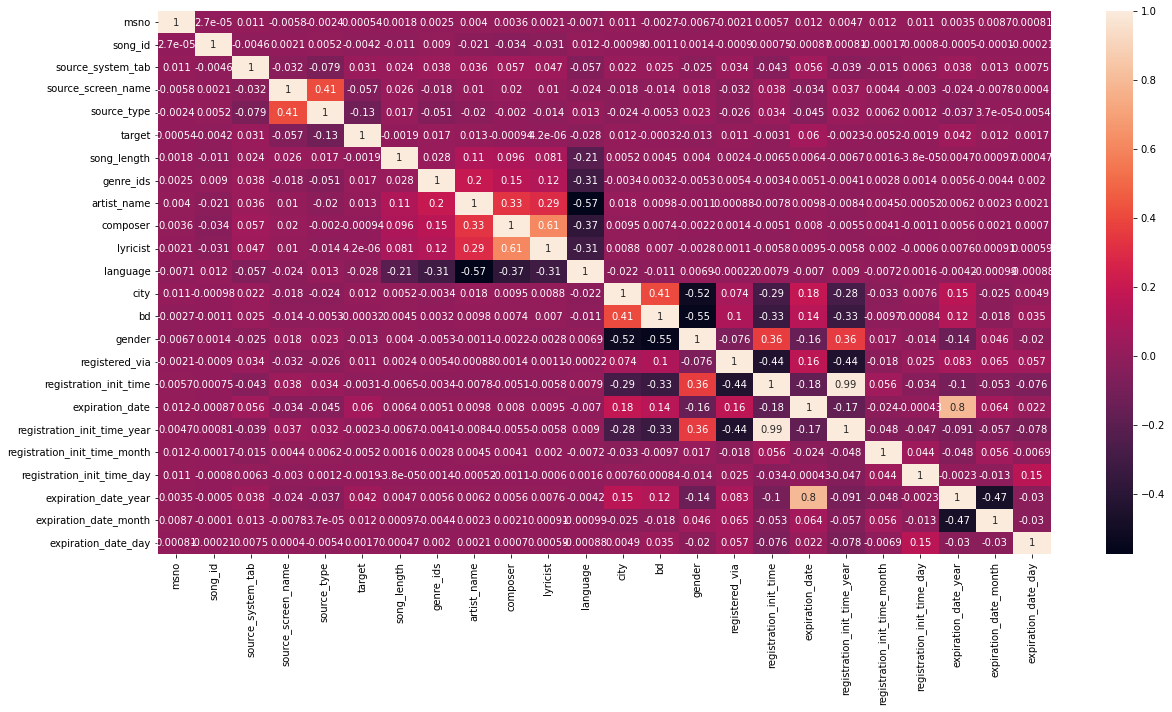

In [17]:
# Сorrelation matrix of the dataset
plt.figure(figsize=[20,10])
sns.heatmap(data.corr(), annot=True)
plt.show()

# Train and Test split

In [18]:
# setting the target varriable
target = data.pop('target')
train_data, test_data, train_labels, test_labels = train_test_split( data , target, test_size = 0.2)
#defingin the train data and the test data shape
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(2950967, 23)
(2950967,)
(737742, 23)
(737742,)


# XGBoosting

In [19]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [20]:
import xgboost as xgb

In [21]:
# Create model
XGB = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5)
XGB.fit(train_data, train_labels)

XGB_TrainScore = XGB.score(train_data, train_labels)
XGB_TrainScore

0.7619302418495361

In [22]:
XGB_TestScore = XGB.score(test_data, test_labels)

XGB_TestScore

0.7107335626818048

In [23]:
y_pred_xgb =XGB.predict(test_data)

<AxesSubplot:>

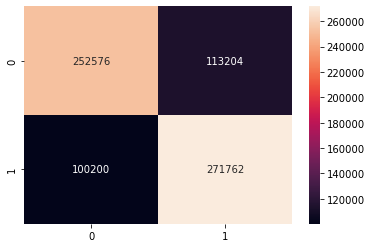

In [24]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
cm_lgbm = confusion_matrix(test_labels, y_pred_xgb)
sns.heatmap(cm_lgbm, annot=True, fmt='g')

In [25]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70    365780
           1       0.71      0.73      0.72    371962

    accuracy                           0.71    737742
   macro avg       0.71      0.71      0.71    737742
weighted avg       0.71      0.71      0.71    737742



# CatBoost Classifier

In [26]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [27]:
from catboost import CatBoostClassifier

In [28]:
# importing liabraries for the 
import seaborn as sns 
from sklearn.metrics import confusion_matrix

In [41]:
CatBoost = CatBoostClassifier(learning_rate=0.1, depth=10, iterations=10)
CatBoost.fit(train_data, train_labels)
CatBoost_TrainScore = CatBoost.score(train_data, train_labels)

0:	learn: 0.6851376	total: 1.37s	remaining: 12.3s
1:	learn: 0.6784791	total: 2.75s	remaining: 11s
2:	learn: 0.6731770	total: 4.14s	remaining: 9.67s
3:	learn: 0.6687217	total: 5.52s	remaining: 8.28s
4:	learn: 0.6651746	total: 6.89s	remaining: 6.89s
5:	learn: 0.6622183	total: 8.3s	remaining: 5.53s
6:	learn: 0.6596682	total: 9.74s	remaining: 4.17s
7:	learn: 0.6577790	total: 11.2s	remaining: 2.79s
8:	learn: 0.6560477	total: 12.5s	remaining: 1.39s
9:	learn: 0.6546886	total: 13.9s	remaining: 0us


In [42]:
#trainscore for the catboost classifier
CatBoost_TrainScore

0.6293337065443294

In [43]:
# test score for the catboost classifier
CatBoost_TestScore = CatBoost.score(test_data, test_labels)
CatBoost_TestScore

0.6296089960989072

In [44]:
# Defining the prediction for the catboost ckassifier
y_pred_catboost = CatBoost.predict(test_data)

<AxesSubplot:>

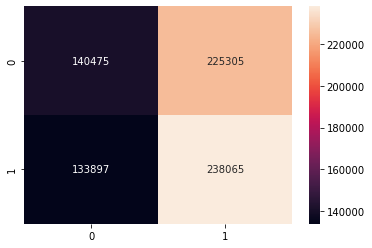

In [45]:
# confussion matrix for the catboost classifier
cm_catboost = confusion_matrix(test_labels, y_pred_catboost)
sns.heatmap(cm_lgbm, annot=True, fmt='g')

In [46]:
# visualising classification report for the catboost classifier
print(classification_report(test_labels, y_pred_catboost))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64    365780
           1       0.64      0.60      0.62    371962

    accuracy                           0.63    737742
   macro avg       0.63      0.63      0.63    737742
weighted avg       0.63      0.63      0.63    737742



# logistic regressor


In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
rf = LogisticRegression()

In [33]:
rf.fit(train_data, train_labels)

C:\Users\91700\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred=rf.predict(test_data)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:",accuracy_score(test_labels, y_pred))

Accuracy: 0.5131062078612848


In [38]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.38      0.44    365780
           1       0.51      0.64      0.57    371962

    accuracy                           0.51    737742
   macro avg       0.51      0.51      0.50    737742
weighted avg       0.51      0.51      0.50    737742



<AxesSubplot:>

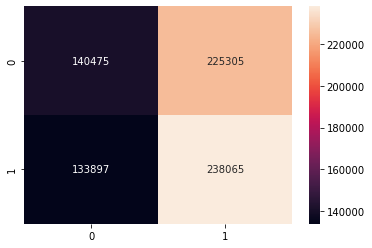

In [39]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
cm_lgbm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm_lgbm, annot=True, fmt='g')